In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reddit = pd.read_csv('reddit_wsb.csv')
reddit.tail()

,title,score,id,url,comms_num,created,body,timestamp,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
50945,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1624276098,**TLDR: ATSG is a fantastic value at its curre...,6/21/2021 14:48,NaN,NaN,NaN,NaN
50946,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1624275386,SENS why to buy\n Skip to end to see summary \...,6/21/2021 14:36,NaN,NaN,NaN,NaN
50947,Market Events June 21 - 25,32,o4lw31,https://www.reddit.com/r/wallstreetbets/commen...,11,1624274473,"#Monday, June 21, 2021\r\n\r\n15:0...",6/21/2021 14:21,NaN,NaN,NaN,NaN
50948,Run to the Sun!🦍🦍🦍 YOLO,33,o4kx0j,https://i.redd.it/rk6z02uw4j671.jpg,13,1624271154,NaN,6/21/2021 13:25,NaN,NaN,NaN,NaN
50949,Father's day confession,1681,o4kc9x,https://v.redd.it/fa355zezyi671,66,1624269194,NaN,6/21/2021 12:53,NaN,NaN,NaN,NaN


In [11]:
reddit['date'] = pd.to_datetime(reddit.timestamp).dt.date
#reddit['hour'] = pd.to_datetime(reddit.timestamp).dt.hour
#reddit['dayOfWeek'] = pd.to_datetime(reddit['timestamp']).dt.day_name()

ParserError: Unknown string format: rsi_b_14

In [5]:
reddit.head()

,title,score,id,url,comms_num,created,body,timestamp,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,1/28/2021 21:37,NaN,NaN,NaN,NaN
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,1/28/2021 21:32,NaN,NaN,NaN,NaN
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,1/28/2021 21:30,NaN,NaN,NaN,NaN
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,1/28/2021 21:28,NaN,NaN,NaN,NaN
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,1/28/2021 21:26,NaN,NaN,NaN,NaN


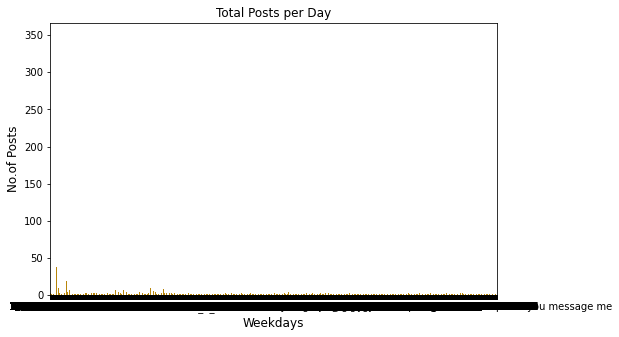

In [13]:
reddit_day = reddit.timestamp

plt.figure(figsize=(8,5))
reddit_day = reddit_day.groupby(reddit_day,sort=False).count().plot.bar(color='darkgoldenrod')
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("No.of Posts", fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Total Posts per Day', fontsize=12)
plt.show()

In [14]:
title_reddit = reddit[['title']].dropna()
body_reddit = reddit[['body']].dropna()

In [15]:
title_reddit

,title
0,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...
2,Exit the system
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC..."
...,...
50945,Atypical DD for WSB: ATSG for a smooth ascent
50946,SENS DD
50947,Market Events June 21 - 25
50948,Run to the Sun!🦍🦍🦍 YOLO


In [16]:
body_reddit

,body
2,The CEO of NASDAQ pushed to halt trading “to g...
6,Hedgefund whales are spreading disinfo saying ...
7,Life isn't fair. My mother always told me that...
10,I believe right now is one of those rare oppo...
12,You guys are champs. GME... who would have tho...
...,...
50941,Following is the data and the corresponding S&...
50942,ZIM Integrated Shipping Services should be at ...
50945,**TLDR: ATSG is a fantastic value at its curre...
50946,SENS why to buy\n Skip to end to see summary \...


In [17]:
def cleantext(text):
    # make lower case
    text = str(text).lower()
    # remove square in brackets
    text = re.sub('\[.*?\]', ' ', text)
    # remove URLs
    text = re.sub(r"http\S+", ' ', text)
    # remove punctuation
    text = re.sub('<.*?>+', ' ', text)
    # remove handlers
    text = re.sub('@[^\s]+', ' ', text)
    # remove all special characters
    text = ' '.join(re.findall(r'\w+', text))
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
    # replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

In [18]:
title_reddit['title'] = title_reddit['title'].apply(cleantext)
body_reddit['body'] = body_reddit['body'].apply(cleantext)

In [19]:
import nltk

In [20]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [21]:
title_reddit['title'] = title_reddit['title'].apply(stemming)
body_reddit['body'] = body_reddit['body'].apply(stemming)

In [22]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\big_j\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
title_reddit['title_values'] = title_reddit['title'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_reddit['body_values'] = body_reddit['body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [24]:
def sent_value(text):
    if text['compound']>0:
        return 'Positive'
    elif text['compound']<0:
        return 'Negative'
    else:
        return 'Neutral'

title_reddit['title_sentiments'] = title_reddit['title_values'].apply(lambda x: sent_value(x))
body_reddit['body_sentiments'] = body_reddit['body_values'].apply(lambda x: sent_value(x))

In [25]:
title_reddit.head()

,title,title_values,title_sentiments
0,it not about the money it about send messag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,math professor scott steiner say the number sp...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",Positive
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,new sec file for gme can someon less retard th...,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...",Negative
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",Positive


In [26]:
body_reddit.head()

,body,body_values,body_sentiments
2,the ceo of nasdaq push to halt trade to give i...,"{'neg': 0.052, 'neu': 0.87, 'pos': 0.078, 'com...",Positive
6,hedgefund whale are spread disinfo say friday ...,"{'neg': 0.09, 'neu': 0.885, 'pos': 0.025, 'com...",Negative
7,life isn fair my mother alway told me that whe...,"{'neg': 0.144, 'neu': 0.785, 'pos': 0.071, 'co...",Negative
10,i believ right now is one of those rare opport...,"{'neg': 0.083, 'neu': 0.792, 'pos': 0.125, 'co...",Positive
12,you guy are champ gme who would have thought b...,"{'neg': 0.077, 'neu': 0.804, 'pos': 0.118, 'co...",Positive


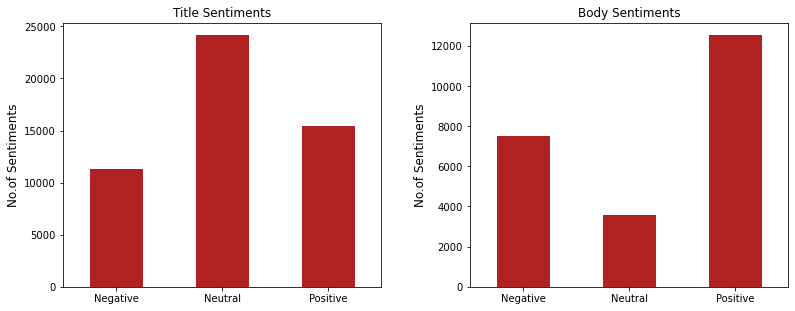

In [27]:
fig, axr = plt.subplots(1,2, figsize=(12, 6))

title_reddit['title_sentiments'].value_counts().sort_index().plot.bar(ax=axr[0], color='firebrick')
ax=axr[0].set_title("Title Sentiments", fontsize=12)

body_reddit['body_sentiments'].value_counts().sort_index().plot.bar(ax=axr[1], color='firebrick')
ax=axr[1].set_title("Body Sentiments", fontsize=12)

fig.tight_layout(pad=5.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation='horizontal')
    plt.ylabel("No.of Sentiments", fontsize=12)

In [28]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [29]:
# FOR TITLE POSTS
title_text = " ".join(review for review in title_reddit['title'])
print ("There are {} words in the combination of all posts.".format(len(title_text)))

There are 2618588 words in the combination of all posts.


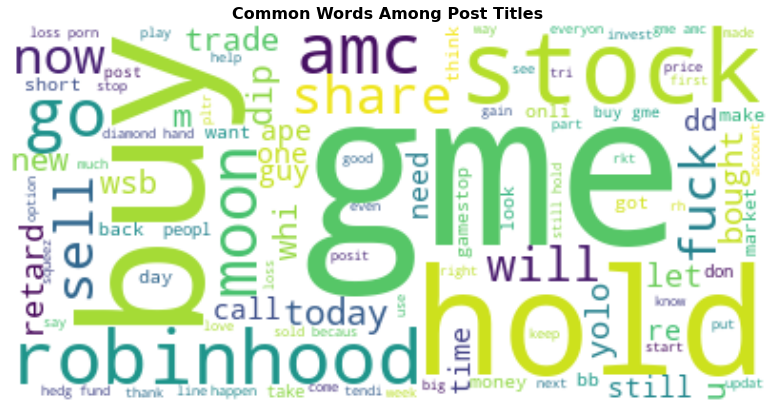

In [31]:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(title_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Titles',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

In [32]:
# FOR BODY POSTS
body_text = " ".join(review for review in body_reddit['body'])
print ("There are {} words in the combination of all post bodies.".format(len(body_text)))

There are 23253045 words in the combination of all post bodies.


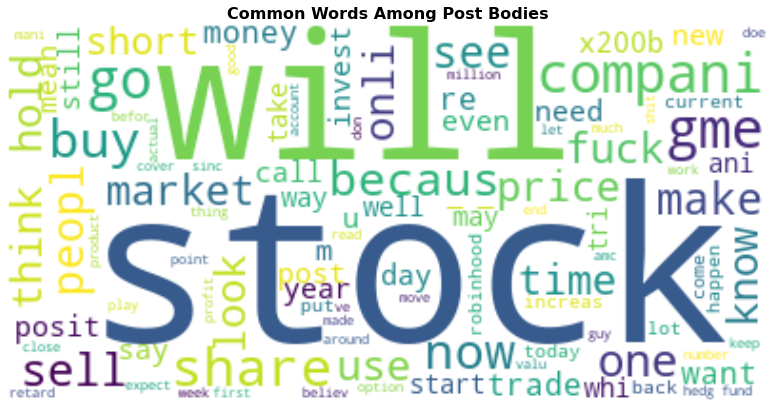

In [33]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100, 
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(body_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Bodies',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

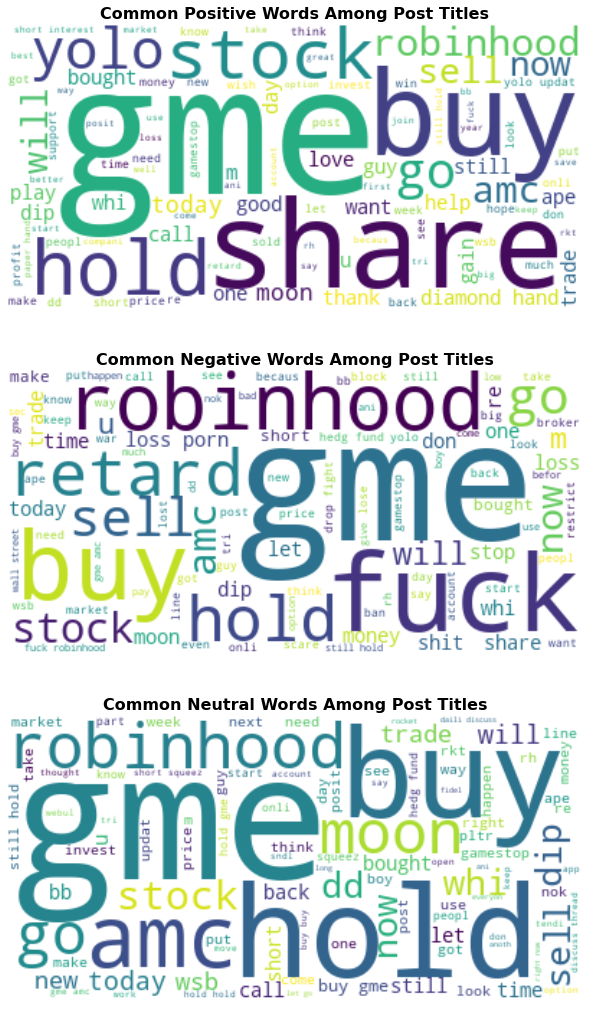

In [34]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    titleSent = title_reddit[title_reddit['title_sentiments']==sentiments[i]]['title']
    titleText = ' '.join(titleSent)
    
    wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3).generate(titleText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Titles',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()

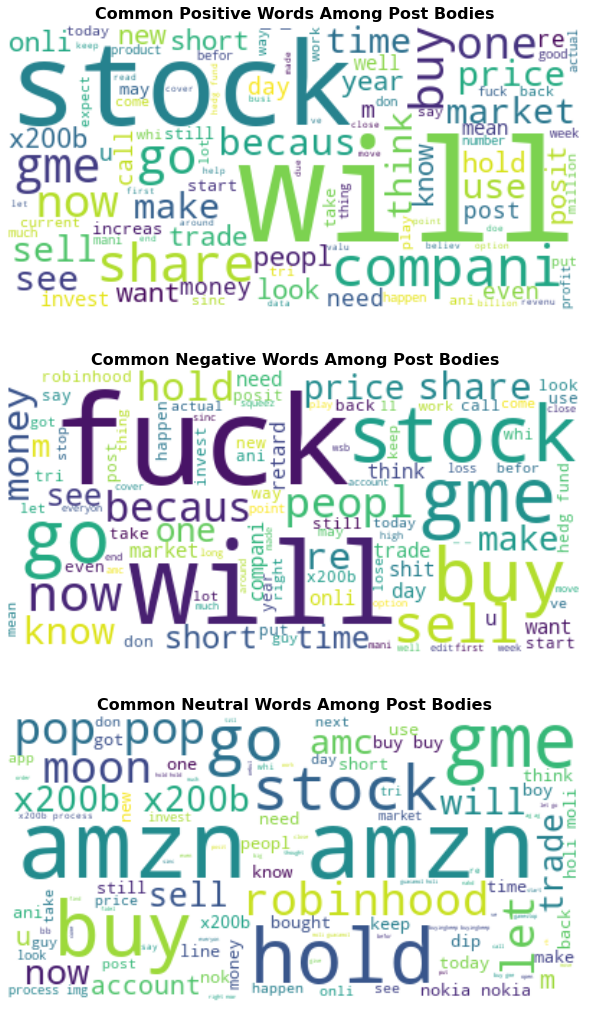

In [35]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    bodySent = body_reddit[body_reddit['body_sentiments']==sentiments[i]]['body']
    bodyText = ' '.join(bodySent)
    
    wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3).generate(bodyText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Bodies',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()